In [13]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [14]:
data_dir = "/Users/eugeneolkhovik/python_files/ML/melanoma/archive"

In [15]:
df = pd.read_csv(os.path.join(data_dir, 'ISIC_2019_Training_Metadata.csv'))
melanoma = pd.read_csv(os.path.join(data_dir, 'ISIC_2019_Training_GroundTruth.csv'))

In [16]:
merged = pd.merge(df, melanoma, on='image',how='outer')

<AxesSubplot:>

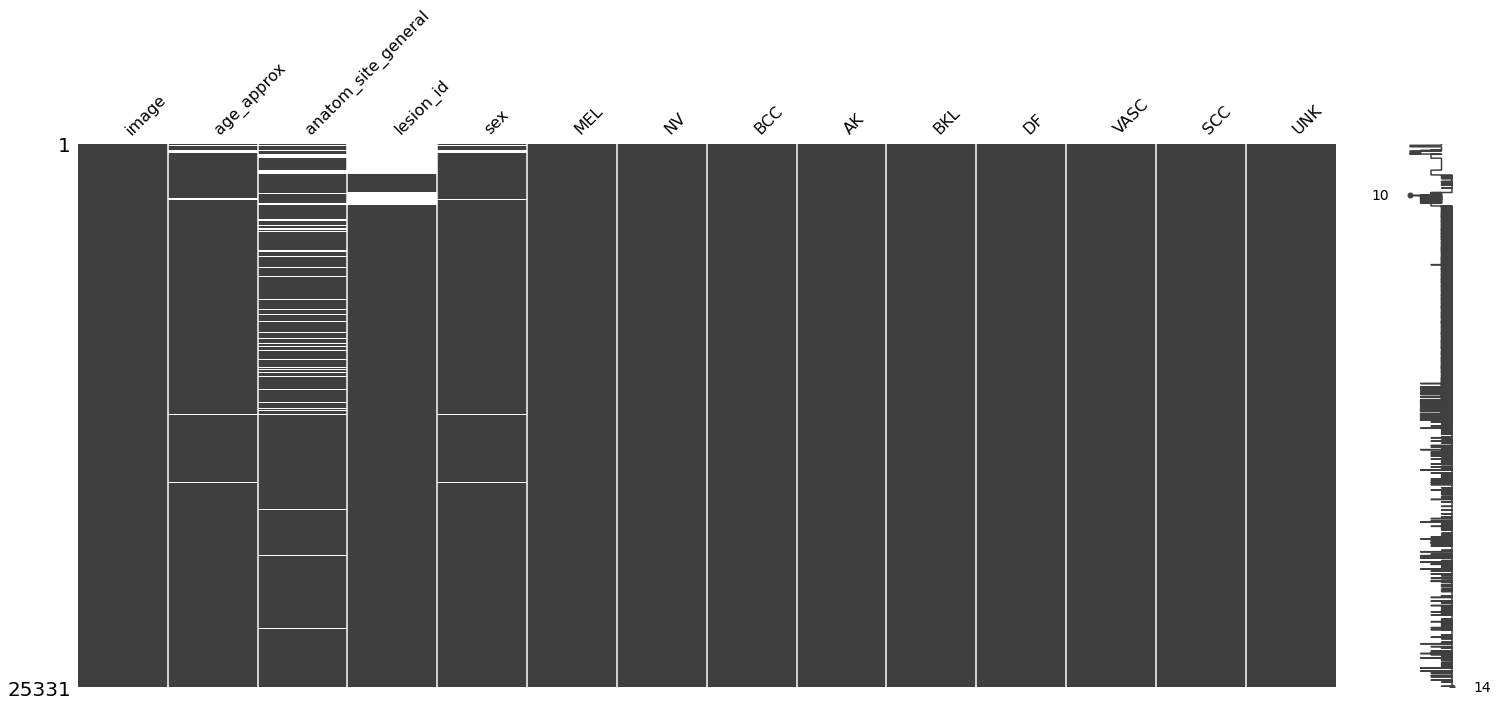

In [17]:
msno.matrix(merged)

In [18]:
merged.columns

Index(['image', 'age_approx', 'anatom_site_general', 'lesion_id', 'sex', 'MEL',
       'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'],
      dtype='object')

In [19]:
extracted = merged.drop_duplicates(subset = ['lesion_id'])[['image','MEL','BCC']]

In [20]:
extracted = extracted[(extracted['MEL'] == 1) | (extracted['BCC'] == 1)]

In [21]:
extracted

,image,MEL,BCC
1482,ISIC_0012678_downsampled,1.0,0.0
1497,ISIC_0012701_downsampled,1.0,0.0
1507,ISIC_0012715_downsampled,1.0,0.0
1522,ISIC_0012749_downsampled,1.0,0.0
1523,ISIC_0012756_downsampled,1.0,0.0
...,...,...,...
25095,ISIC_0072887,1.0,0.0
25221,ISIC_0073081,0.0,1.0
25222,ISIC_0073082,0.0,1.0
25239,ISIC_0073113,0.0,1.0


In [22]:
extracted.sum()

image    ISIC_0012678_downsampledISIC_0012701_downsampl...
MEL                                                 1339.0
BCC                                                 1310.0
dtype: object

In [23]:

extracted.to_csv(path_or_buf=os.path.join(data_dir,'extracted_features.csv'), header =True,index=True, encoding = "ISO-8859-1")


In [24]:
path = os.path.join(data_dir,'ISIC_2019_Training_Input/ISIC_2019_Training_Input')
dirs = os.listdir( path )